<h2>Content Based Recommendation using Python</h2>

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

<h2>Importing Libraries</h2>

In [5]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import time
import datetime

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#nltk libraries 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jagri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:

#Set random seed value
np.random.seed(42)

# Read the data.json
data = pd.read_json('data.json')
user_profiles = pd.read_csv('user_profiles.csv', index_col=0)

# user_activities = pd.read_csv('user_activities.csv', index_col=0)
user_activities = pd.read_csv('user_activities.csv')
user_activities.rename(columns = {'User Id':'Name'}, inplace = True)


#Indexing, Data Pre-processing
data.set_index('content_id', inplace=True)
data_isnull = data.isnull().sum()

#convert date to datetime
dates = data['date']
timestamps = [ time.mktime(datetime.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').timetuple()) for date in dates]
data['timestamps'] = timestamps

#Value Counts
print(data['category'].value_counts())
print(data['authors'].value_counts())
print(data['date'].value_counts())


ENTERTAINMENT    30
POLITICS         29
WORLD NEWS       10
COMEDY            7
BLACK VOICES      6
WOMEN             4
WEIRD NEWS        4
CRIME             4
QUEER VOICES      3
IMPACT            2
SPORTS            1
BUSINESS          1
Name: category, dtype: int64
Ron Dicker                                    11
Ed Mazza                                       8
Mary Papenfuss                                 6
Andy McDonald                                  6
Jenna Amatulli                                 6
Sebastian Murdock                              5
                                               4
Marina Fang                                    3
Lee Moran                                      3
Jennifer Bendery                               2
David Moye                                     2
Emma Gray                                      2
Curtis M. Wong                                 2
Todd Van Luling                                2
Laura Bassett                                

<h2> Visualizations </h2>

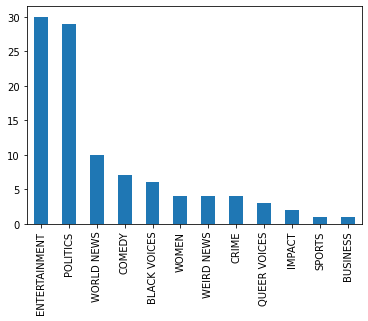

In [8]:
#data spread across categoroies
data['category'].value_counts().plot(kind='bar')

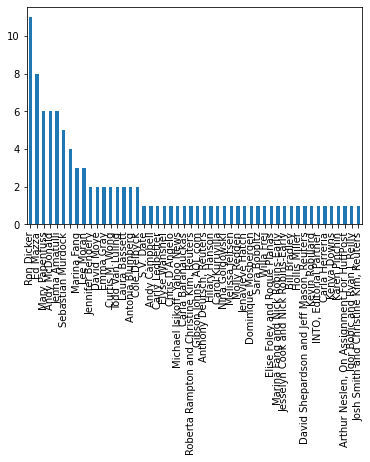

In [9]:
#Count of no. of stories/headlines by each author
data['authors'].value_counts().plot(kind='bar')

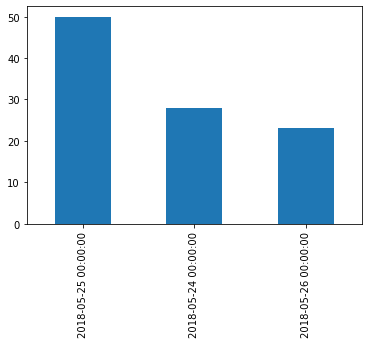

In [10]:
data['date'].value_counts().plot(kind='bar')

In [11]:
data=data.drop(['link'], axis=1)
data = data.drop(['date'], axis=1)
data

,category,headline,authors,short_description,timestamps
content_id,,,,,
1,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,She left her husband. He killed their children...,1.527273e+09
2,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,Of course it has a song.,1.527273e+09
3,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,The actor and his longtime girlfriend Anna Ebe...,1.527273e+09
4,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,The actor gives Dems an ass-kicking for not fi...,1.527273e+09
5,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,"The ""Dietland"" actress said using the bags is ...",1.527273e+09
...,...,...,...,...,...
97,POLITICS,Senate Advances Court Pick Who Said Planned Pa...,Jennifer Bendery,Every Republican on the judiciary committee vo...,1.527100e+09
98,POLITICS,Rudy Giuliani: Trump Won't Interview With Muel...,S.V. Date,The canceled North Korea summit doesn’t mean t...,1.527100e+09
99,POLITICS,Kentucky Attorney Running For Judge Dies 1 Day...,Nina Golgowski,"Danny Alvarez, a married of father of three, w...",1.527100e+09


In [12]:
data_dummies = pd.get_dummies(data, columns = ['category', 'authors'])
data_dummies

,headline,short_description,timestamps,category_BLACK VOICES,category_BUSINESS,category_COMEDY,category_CRIME,category_ENTERTAINMENT,category_IMPACT,category_POLITICS,...,"authors_Michael Isikoff, Yahoo News",authors_Molly Redden,authors_Nina Golgowski,"authors_Roberta Rampton and Christine Kim, Reuters",authors_Ron Dicker,authors_S.V. Date,authors_Sara Boboltz,authors_Sebastian Murdock,authors_Todd Van Luling,authors_Willa Frej
content_id,,,,,,,,,,,,,,,,,,,,,
1,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,1.527273e+09,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,1.527273e+09,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,1.527273e+09,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,1.527273e+09,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",1.527273e+09,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Senate Advances Court Pick Who Said Planned Pa...,Every Republican on the judiciary committee vo...,1.527100e+09,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
98,Rudy Giuliani: Trump Won't Interview With Muel...,The canceled North Korea summit doesn’t mean t...,1.527100e+09,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
99,Kentucky Attorney Running For Judge Dies 1 Day...,"Danny Alvarez, a married of father of three, w...",1.527100e+09,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [13]:
user_profiles

,Gender,Age,Geography,Profession,Interested Topic
Name,,,,,
A,Female,28,Jakarta,Actor,"ENTERTAINMENT, MEDIA, POLITICS"
B,Female,28,Jakarta,Engineer,"POLITICS, MEDIA"
C,Male,55,India,Doctor,WORLD NEWS
D,Male,15,India,Student,"COMEDY, MEDIA"
E,Female,45,Jakarta,Engineer,WORLD NEWS
F,Female,35,Jakarta,Lawyer,"SPORTS,COMEDY"


In [14]:
user_profiles.columns

Index(['Gender', 'Age', 'Geography', 'Profession', 'Interested Topic'], dtype='object')

In [15]:
user_activities

,Name,Content Visited ID,Time spends(Seconds)
0,A,1,20
1,A,2,10
2,A,3,1200
3,B,2,1200
4,B,4,30


In [16]:
user_activities.columns

Index(['Name', 'Content Visited ID', 'Time spends(Seconds)'], dtype='object')

In [17]:
#Merge table 2 and 3 using outer join and find similarity between users later

user_merged = pd.merge(user_profiles,user_activities,on='Name', how='outer')
user_merged.fillna(0, inplace=True)
user_merged.set_index('Name')


,Gender,Age,Geography,Profession,Interested Topic,Content Visited ID,Time spends(Seconds)
Name,,,,,,,
A,Female,28,Jakarta,Actor,"ENTERTAINMENT, MEDIA, POLITICS",1.0,20.0
A,Female,28,Jakarta,Actor,"ENTERTAINMENT, MEDIA, POLITICS",2.0,10.0
A,Female,28,Jakarta,Actor,"ENTERTAINMENT, MEDIA, POLITICS",3.0,1200.0
B,Female,28,Jakarta,Engineer,"POLITICS, MEDIA",2.0,1200.0
B,Female,28,Jakarta,Engineer,"POLITICS, MEDIA",4.0,30.0
C,Male,55,India,Doctor,WORLD NEWS,0.0,0.0
D,Male,15,India,Student,"COMEDY, MEDIA",0.0,0.0
E,Female,45,Jakarta,Engineer,WORLD NEWS,0.0,0.0
F,Female,35,Jakarta,Lawyer,"SPORTS,COMEDY",0.0,0.0


In [18]:
user_merged['Gender'].value_counts()

Female     5
Male       2
Female     2
Name: Gender, dtype: int64

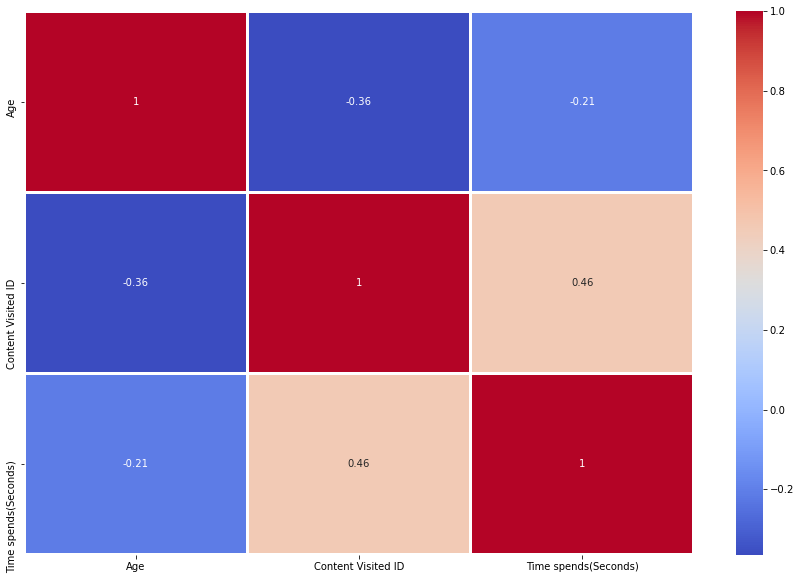

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(user_merged.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [20]:
# Data group by category
data_groupby_category = data.groupby(["category", "authors"])["headline"].count()
data_groupby_category

category      authors                                   
BLACK VOICES  Carla Baranauckas                             1
              Jenna Amatulli                                2
              Kenya Downs                                   1
              Sebastian Murdock                             2
BUSINESS      David Shepardson and Jeff Mason, Reuters      1
                                                           ..
WORLD NEWS    Antonia Blumberg                              1
              Dominique Mosbergen                           1
              Jesselyn Cook and Nick Robins-Early           1
              Josh Smith and Christine Kim, Reuters         1
              Roberta Rampton and Christine Kim, Reuters    1
Name: headline, Length: 68, dtype: int64

<h2>Popularity</h2>

In [21]:

#Based on popularity, content_id 2 is most visited and can be recommended to other others
s = user_activities.groupby(['Content Visited ID'])['Time spends(Seconds)'].count()
s

Content Visited ID
1    1
2    2
3    1
4    1
Name: Time spends(Seconds), dtype: int64

<h2>Vectorization and Cosine Similarity </h2>

In [22]:
# Content Based filtering
#find similar news read by a user and recommend that, find similarity between the category, headlines, story, etc.
#Merge headline and short decription

stoplist  = set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

def lemmatized_text(text):
   
    words=word_tokenize(text)
    wordsFiltered=[]
    for w in words:
        if w not in stoplist:
            w=lemmatizer.lemmatize(w)
            wordsFiltered.append(w)
    print(wordsFiltered)       
    return wordsFiltered


news = [ headline + " " + short_description for headline, short_description in zip(data['headline'], data['short_description'])]
print(news)

# news = [ lemmatized_text(headline).append(lemmatized_text(short_description)) for headline, short_description in zip(data['headline'], data['short_description'])]

# Use cosine similarity of news



['There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.', "Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song Of course it has a song.", 'Hugh Grant Marries For The First Time At Age 57 The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.', "Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.", 'Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog The "Dietland" actress said using the bags is a "really cathartic, therapeutic moment."', 'Morgan Freeman \'Devastated\' That Sexual Harassment Claims Could Undermine Legacy "It is not right to equate horrific incidents of sexual assault with misplaced compliments or humor," he said in a statement.', "Donald Trump Is Lovin' New McDonald's Jingle In 'Tonight Show' Bit It's cat

In [23]:
cv = CountVectorizer()
count_matrix =cv.fit_transform(news)
print(count_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
stories_similarity_scores = cosine_similarity(count_matrix)
print(stories_similarity_scores)

[[1.         0.         0.07027284 ... 0.10050378 0.         0.        ]
 [0.         1.         0.19920477 ... 0.15194744 0.04052204 0.18442778]
 [0.07027284 0.19920477 1.         ... 0.09534626 0.1356127  0.18516402]
 ...
 [0.10050378 0.15194744 0.09534626 ... 1.         0.         0.08827348]
 [0.         0.04052204 0.1356127  ... 0.         1.         0.12555296]
 [0.         0.18442778 0.18516402 ... 0.08827348 0.12555296 1.        ]]


<h2>Content Based Filtering</h2>

- If a user has read this headline 'Hugh Grant Marries For The First Time At Age 57', what are the 5 other similar stories/headlines which can be shown to this user?

In [25]:
def get_headline_from_index(index):
    return data[data.index == index]["headline"].values[0]
def get_index_from_headline(headline):
    return data[data.headline == headline].index.values[0]

# enumerate each row of the similarity scores and then sort the tuples according to similarity scores
headline_user_read = 'Hugh Grant Marries For The First Time At Age 57'
headline_index = get_index_from_headline(headline_user_read)
similar_headlines = list(enumerate(stories_similarity_scores[headline_index]))
# print(similar_headlines)
sorted_similar_headlines = sorted(similar_headlines, key =lambda x:x[1], reverse=True)
# Print the top 5 similar headlines
print(sorted_similar_headlines[:5])

# print the category and headline
i=0
for headline in sorted_similar_headlines:
    if i<5:
        try:
            print(get_headline_from_index(headline[0]))
        except:
            print('Error ', get_headline_from_index(headline[0]))
    i+=1        

    

[(3, 0.9999999999999996), (2, 0.2506402059138015), (63, 0.22568905807670636), (92, 0.21155435413917806), (85, 0.2044652050273827)]
Hugh Grant Marries For The First Time At Age 57
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song
A Member Of The Far-Right Proud Boys Menaced A Twitter User On His Doorstep
Trump Abruptly Cancels North Korea Summit With Kim Jong Un
Amy Poehler: A 'Parks And Recreation' Revival Would Be 'Amazing'


<h3> We can also find users similarity and if user 1 has read a headline/story and user1 and user2 are similar, then show this headline to user 2 also </h3>

<h2> Other Techniques</h2>

- Collaborative Filtering - find similar users and based on user 1 read, recommend same to user 2
    - User to User collaborative filtering
    - Item to Item collaborative filtering

- Use Google's pretrained model for news recommendation

- Apply Classification(based on categories, etc.) of the data table merged with both user tables

- Evaluation Techniques like Accuracy, ROC-AUC, Hit Ratio  can be used

<h2> Limitations of Data </h2>
- Both User Tables is very limited, just 6 users and for them also activity is given only for 3 users.
- We could have created negative data for users, if needed.